In [1]:
%reload_ext autoreload
%autoreload 2

I have been having a lot of trouble generating word clouds on the Javascript side. It also has to place the words every time I click on a cell.

This is a bit pointless since these clouds are static. I should be able to generate all these as static SVGs and return them on the client side

In [2]:
from biohasher import get_project
import path_fixes as pf

In [3]:
bhash = get_project(pf.PROJECT)

In [4]:
top_k = 20
concepts = [bhash.get_mem_concepts(h, top_k) for h in range(bhash.n_heads)]

Loading synapses...
Loading Tokenizer...


/Users/benjamin.hoover@ibm.com/Projects/flybrain-nlp-vis/backend/biohasher.py:13: RuntimeWarning: overflow encountered in exp
  v = np.exp(beta*x)
/Users/benjamin.hoover@ibm.com/Projects/flybrain-nlp-vis/backend/biohasher.py:14: RuntimeWarning: invalid value encountered in true_divide
  return v / np.sum(v)


# Trying out Wordclouds

The first, from https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5

In [5]:
!pip install -U wordcloud

Requirement already up-to-date: wordcloud in /Users/benjamin.hoover@ibm.com/anaconda3/envs/flybrain/lib/python3.8/site-packages (1.8.1)
  Using cached Pillow-8.1.0-cp38-cp38-macosx_10_10_x86_64.whl (2.2 MB)


We need to convert our frequency information for each memory into a format WordCloud can use

In [39]:
def to_frequencies(concepts, add_eps=1e-7):
    """Convert biohash concepts into frequency information
    
    Args:
        concepts: [{'token': 'text', 'contribution', 0.18}]
        add_eps: Prevent division by 0 in the wordcloud by adding to the contribution
        
    """
    return {k['token']:k['contribution']+add_eps for k in concepts}

In [58]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt

# Define a function to plot word cloud
def plot_cloud(wordcloud, showfig=True):
    fig = plt.figure(figsize=(30, 20))
    plt.axis("off"); 
    plt.imshow(wordcloud) 
    return fig

In [73]:
cloud = WordCloud(
    font_path="./Kufam/static/Kufam-Medium.ttf",
    width = 600,
    height = 600,
    prefer_horizontal=0.9,
    min_font_size=25,
    margin=25,
    font_step=2,
    random_state=1,
    background_color='white',
    color_func=lambda *args, **kwargs: "black",
    colormap='bone',
    collocations=False)

In [75]:
data

{'<NUM>': 0.985193233354187,
 '–': 0.005015641799366474,
 'exclusives': 0.00013505497114490718,
 'ebooks': 0.00010612287511574105,
 'extra': 2.2594883037323597e-06,
 'including': 2.240098558811587e-06,
 'just': 2.157601932392572e-06,
 'who': 1.8891704828798537e-06,
 'events': 1.700242512722616e-06,
 'only': 1.6926668766041984e-06,
 'like': 1.6172247458394849e-06,
 'will': 1.527002189302584e-06,
 'people': 1.443954181720619e-06,
 'it’s': 1.400665758208197e-06,
 'can': 1.394779735871998e-06,
 'especially': 1.3823312545151565e-06,
 'ads': 1.3506914117693667e-06,
 'new': 1.335048671333061e-06,
 'time': 1.2255780236751888e-06,
 'first': 1.2233727263970649e-06}

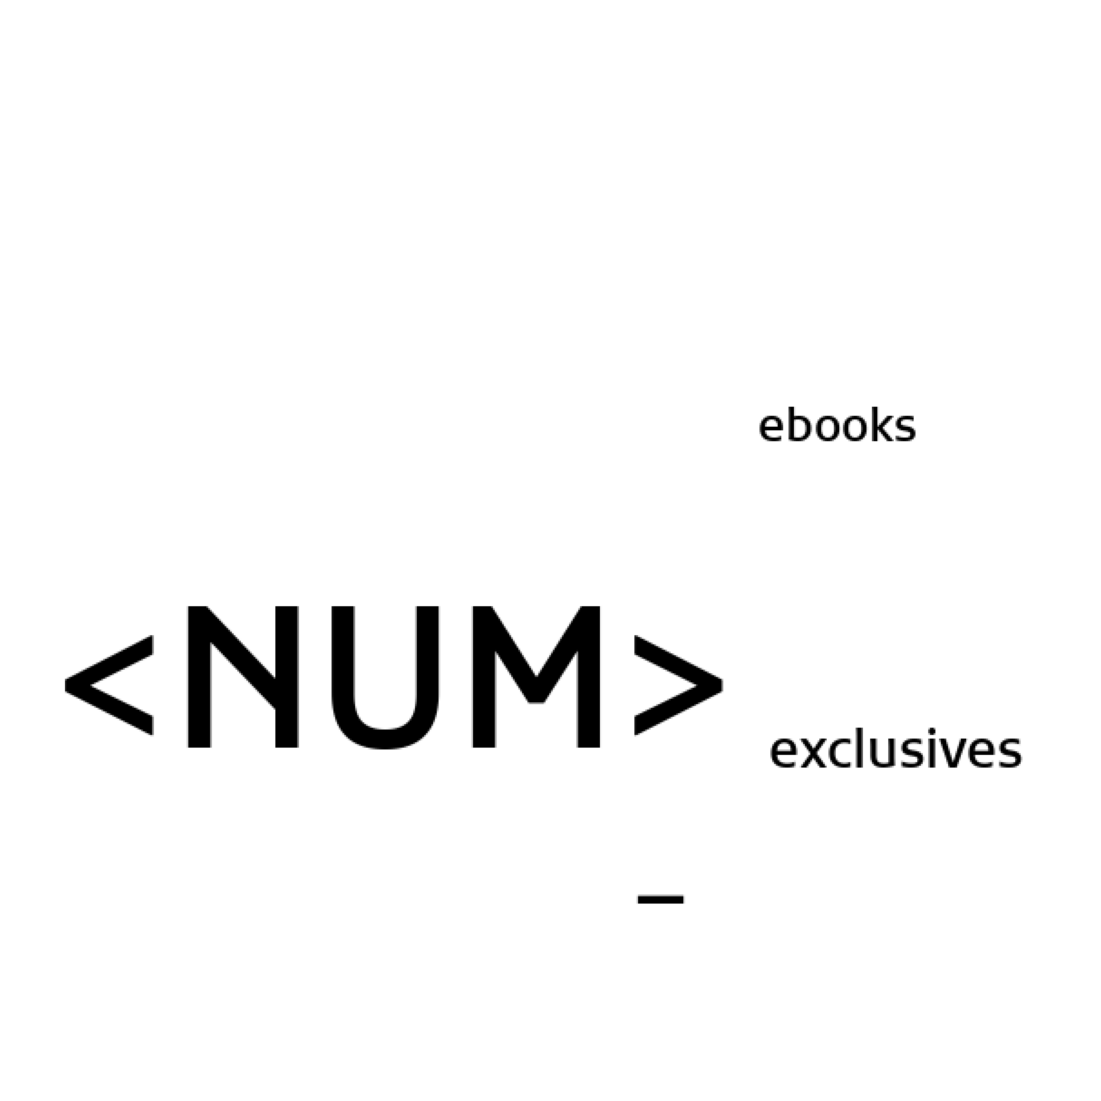

In [74]:
data = to_frequencies(concepts[92])
wordcloud = cloud.generate_from_frequencies(data)
fig = plot_cloud(wordcloud)

In [72]:
result_path = pf.CLIENT / "public/wordclouds"
force_redo = True
def to_file_name(ID): return f"cloud_unit_{ID}.png"

# I can parallelize this and make it a script with nbdev easy
for i, c in enumerate(concepts):
    outname = result_path / to_file_name(i)
    if not force_redo and outname.exists():
        print(f"Starting concept number {i}/{bhash.n_heads}. Skipping")
        continue
    print(f"Starting concept number {i}/{bhash.n_heads}")
    data = to_frequencies(c)
    wordcloud = cloud.generate_from_frequencies(data)
    fig = plot_cloud(wordcloud, False)
    fig.savefig(outname, transparent=True)
    plt.close(fig)

Starting concept number 0/400
Starting concept number 1/400
Starting concept number 2/400
Starting concept number 3/400
Starting concept number 4/400
Starting concept number 5/400
Starting concept number 6/400
Starting concept number 7/400
Starting concept number 8/400
Starting concept number 9/400
Starting concept number 10/400
Starting concept number 11/400
Starting concept number 12/400
Starting concept number 13/400
Starting concept number 14/400
Starting concept number 15/400
Starting concept number 16/400
Starting concept number 17/400
Starting concept number 18/400
Starting concept number 19/400
Starting concept number 20/400
Starting concept number 21/400
Starting concept number 22/400
Starting concept number 23/400
Starting concept number 24/400
Starting concept number 25/400
Starting concept number 26/400
Starting concept number 27/400
Starting concept number 28/400
Starting concept number 29/400
Starting concept number 30/400
Starting concept number 31/400
Starting concept n

Starting concept number 260/400
Starting concept number 261/400
Starting concept number 262/400
Starting concept number 263/400
Starting concept number 264/400
Starting concept number 265/400
Starting concept number 266/400
Starting concept number 267/400
Starting concept number 268/400
Starting concept number 269/400
Starting concept number 270/400
Starting concept number 271/400
Starting concept number 272/400
Starting concept number 273/400
Starting concept number 274/400
Starting concept number 275/400
Starting concept number 276/400
Starting concept number 277/400
Starting concept number 278/400
Starting concept number 279/400
Starting concept number 280/400
Starting concept number 281/400
Starting concept number 282/400
Starting concept number 283/400
Starting concept number 284/400
Starting concept number 285/400
Starting concept number 286/400
Starting concept number 287/400
Starting concept number 288/400
Starting concept number 289/400
Starting concept number 290/400
Starting